## To Perform Statistical Analysis on the growth of ku80 vs mutants generated.

### Growth of cmr1 mtant vs ku80 (April 29, 2025)

=== ANOVA Table ===
                                sum_sq    df           F        PR(>F)
C(strain)                   585.640000   1.0    2.057940  1.617579e-01
C(temperature)            57153.015556   2.0  100.417881  5.096505e-14
C(strain):C(temperature)    621.680000   2.0    1.092292  3.484178e-01
Residual                   8537.276667  30.0         NaN           NaN


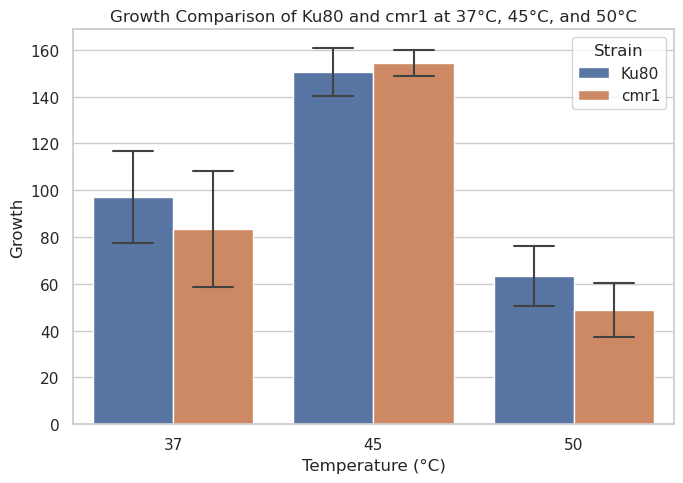

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# === STEP 1: Define your updated data ===
data = {
    'growth': [
        # Ku80 at 37°C
        124.7, 80.8, 100.9, 118.3, 86, 70.8,
        # Ku80 at 45°C
        145, 169.9, 157.9, 141, 144.1, 144.9,
        # Ku80 at 50°C
        79.6, 49.4, 80.8, 63, 52.7, 54.3,
        # cmr1 at 37°C
        66.1, 41.9, 75.3, 101.5, 111.7, 105,
        # cmr1 at 45°C
        158.1, 155.7, 143, 152.2, 155.6, 160.2,
        # cmr1 at 50°C
        55.3, 44.2, 26.6, 61.3, 48.1, 57.1
    ],
    'strain': (
        ['Ku80'] * 18 +     # 3 temps × 6 replicates
        ['cmr1'] * 18
    ),
    'temperature': (
        ['37'] * 6 + ['45'] * 6 + ['50'] * 6 +
        ['37'] * 6 + ['45'] * 6 + ['50'] * 6
    )
}

df = pd.DataFrame(data)

# === STEP 2: Perform two-way ANOVA ===
model = ols('growth ~ C(strain) * C(temperature)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("=== ANOVA Table ===")
print(anova_table)

# === STEP 3: Plotting the results ===
sns.set(style='whitegrid')

plt.figure(figsize=(7, 5))
sns.barplot(
    data=df,
    x='temperature',
    y='growth',
    hue='strain',
    ci='sd',
    capsize=0.2,
    errwidth=1.5
)

plt.title('Growth Comparison of Ku80 and cmr1 at 37°C, 45°C, and 50°C')
plt.xlabel('Temperature (°C)')
plt.ylabel('Growth')
plt.legend(title='Strain')
plt.tight_layout()
plt.show()


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
    37     45    62.05    0.0   44.8358  79.2642   True
    37     50 -34.2167 0.0001  -51.4309 -17.0024   True
    45     50 -96.2667    0.0 -113.4809 -79.0524   True
-------------------------------------------------------


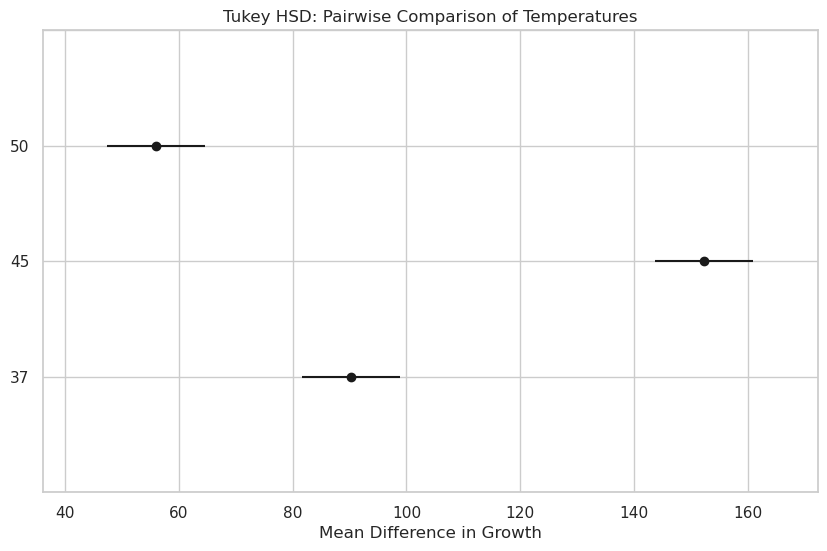

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD to test pairwise differences between temperature levels
tukey_result = pairwise_tukeyhsd(
    endog=df['growth'],        # The dependent variable
    groups=df['temperature'],  # The group labels to compare
    alpha=0.05                 # Significance level
)

print(tukey_result)

# Optional: plot the Tukey HSD confidence intervals
tukey_result.plot_simultaneous()
plt.title("Tukey HSD: Pairwise Comparison of Temperatures")
plt.xlabel("Mean Difference in Growth")
plt.show()


### Save Tukey HSD results as a CSV file

In [6]:
import pandas as pd

# Convert Tukey result to a DataFrame
tukey_summary = pd.DataFrame(
    data=tukey_result._results_table.data[1:],  # skip header row
    columns=tukey_result._results_table.data[0] # header
)

# Save to CSV
tukey_summary.to_csv('ku80_cmr1_tukey_results.csv', index=False)

print("Tukey results saved as 'ku80_cmr1_tukey_results.csv'")


Tukey results saved as 'ku80_cmr1_tukey_results.csv'


### Add p-value annotations on the barplot

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

37_ΔKu80 vs. 45_ΔKu80: t-test independent samples with Bonferroni correction, P_val:1.761e-03 t=-5.419e+00
45_ΔKu80 vs. 50_ΔKu80: t-test independent samples with Bonferroni correction, P_val:1.751e-06 t=1.200e+01
37_Δcmr1 vs. 45_Δcmr1: t-test independent samples with Bonferroni correction, P_val:5.976e-04 t=-6.214e+00
45_Δcmr1 vs. 50_Δcmr1: t-test independent samples with Bonferroni correction, P_val:2.668e-08 t=1.856e+01
37_ΔKu80 vs. 50_ΔKu80: t-test independent samples with Bonferroni correction, P_val:5.481e-02 t=3.223e+00
37_Δcmr1 vs. 50_Δcmr1: t-test independent samples with Bonferroni correction, P_val:1.027e-01 t=2.854e+00


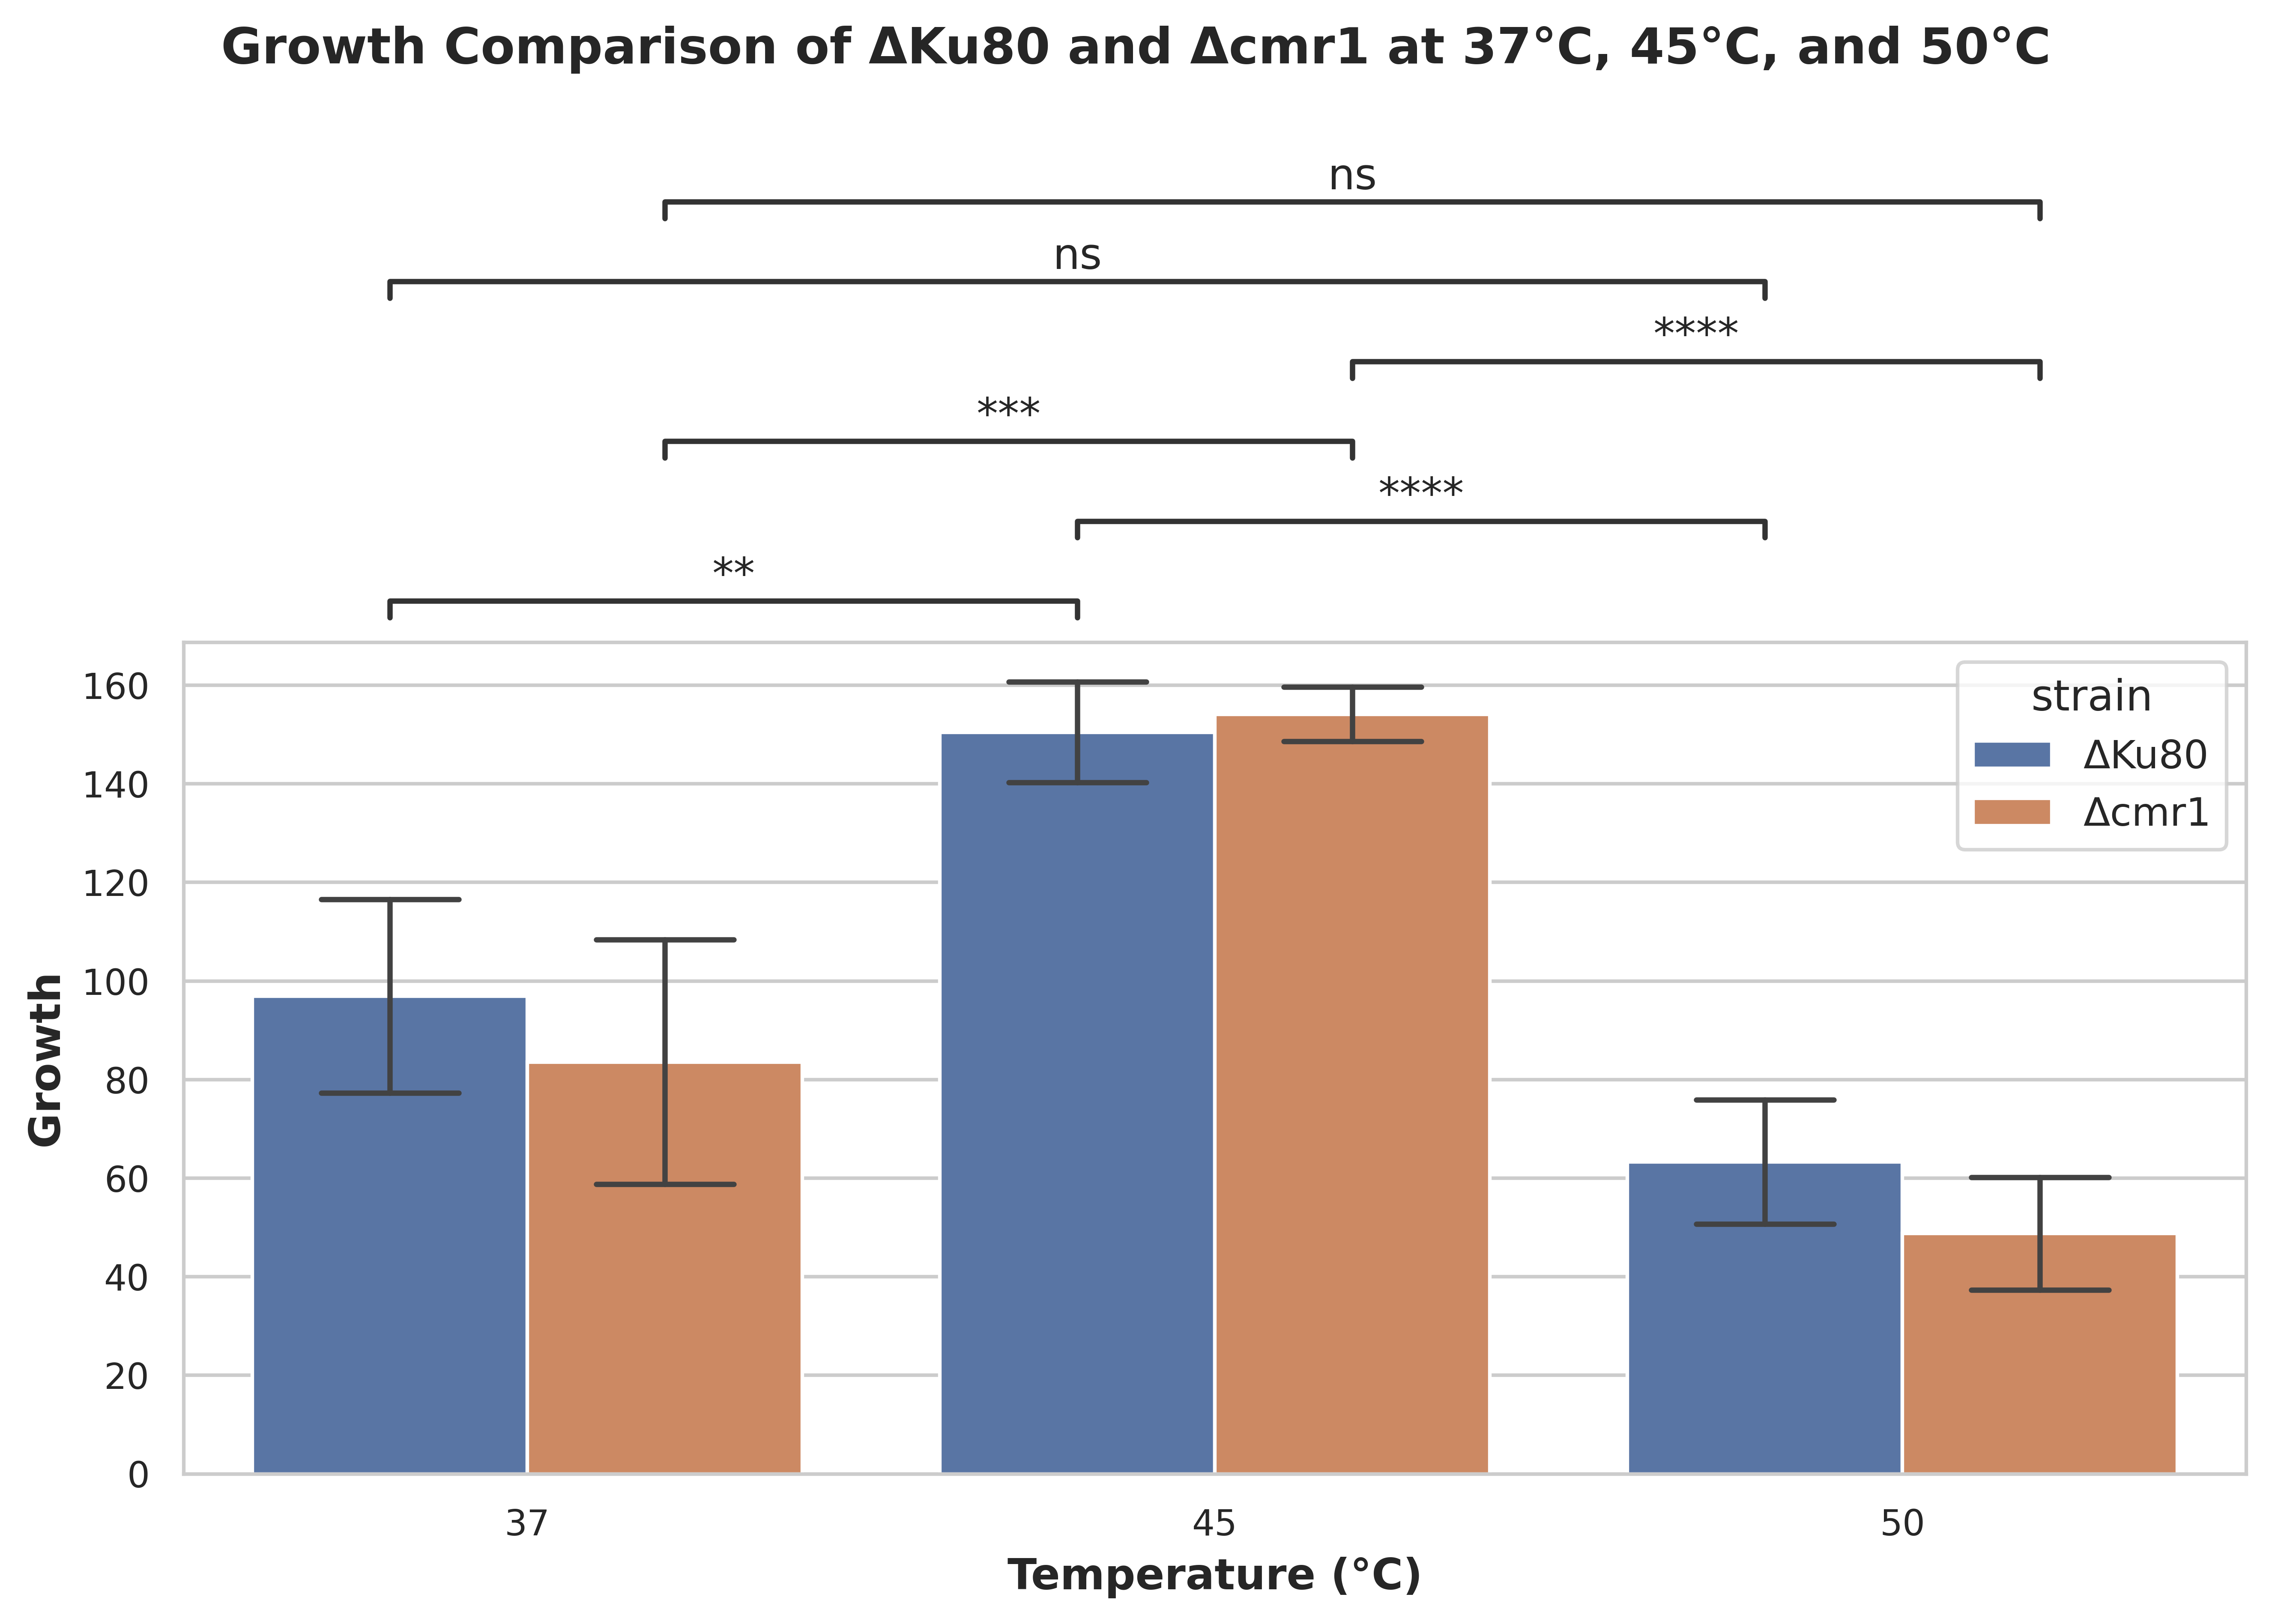

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Prepare data
data = {
    'growth': [
        124.7, 80.8, 100.9, 118.3, 86, 70.8,
        145, 169.9, 157.9, 141, 144.1, 144.9,
        79.6, 49.4, 80.8, 63, 52.7, 54.3,
        66.1, 41.9, 75.3, 101.5, 111.7, 105,
        158.1, 155.7, 143, 152.2, 155.6, 160.2,
        55.3, 44.2, 26.6, 61.3, 48.1, 57.1
    ],
    'strain': ['ΔKu80'] * 18 + ['Δcmr1'] * 18,
    'temperature': ['37'] * 6 + ['45'] * 6 + ['50'] * 6 + ['37'] * 6 + ['45'] * 6 + ['50'] * 6
}
df = pd.DataFrame(data)

# Set up high-resolution plot
sns.set(style='whitegrid', font_scale=1.0)
fig, ax = plt.subplots(figsize=(9, 6), dpi=600)

barplot = sns.barplot(
    data=df,
    x='temperature',
    y='growth',
    hue='strain',
    ci='sd',
    capsize=0.2,
    errwidth=1.5,
    ax=ax
)

# Define statistical comparisons
pairs = [
    (("37", "ΔKu80"), ("45", "ΔKu80")),
    (("45", "ΔKu80"), ("50", "ΔKu80")),
    (("37", "ΔKu80"), ("50", "ΔKu80")),
    (("37", "Δcmr1"), ("45", "Δcmr1")),
    (("45", "Δcmr1"), ("50", "Δcmr1")),
    (("37", "Δcmr1"), ("50", "Δcmr1"))
]

annotator = Annotator(ax, pairs, data=df, x='temperature', y='growth', hue='strain')
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction="bonferroni")
annotator.apply_and_annotate()

# Labels and layout
ax.set_xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_ylabel('Growth', fontsize=12, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
#ax.tick_params(axis='both', labelsize=8)
#for label in ax.get_xticklabels() + ax.get_yticklabels():
    #label.set_fontweight('bold')

fig.suptitle('Growth Comparison of ΔKu80 and Δcmr1 at 37°C, 45°C, and 50°C', y=1.05, fontsize=14, fontweight='bold')
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)

plt.tight_layout()
plt.subplots_adjust(top=0.65)
plt.savefig("final_annotated_growth_plot.png", dpi=600, bbox_inches='tight')
plt.show()


### to check conidia versus pregermination of ku80


=== Two-way ANOVA Table ===
                                       sum_sq    df          F        PR(>F)
C(Temperature)                   52869.174032   2.0  65.801658  1.664679e-11
C(Inoculum_Type)                   762.875002   1.0   1.898968  1.787347e-01
C(Temperature):C(Inoculum_Type)   4135.201589   2.0   5.146725  1.222161e-02
Residual                         11650.208333  29.0        NaN           NaN

=== Post-hoc Tukey HSD Results ===
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------------------
               37_Conidia 37_Pre-germinated Conidia     19.65 0.5439  -15.6269  54.9269  False
               37_Conidia                45_Conidia     53.55 0.0009   18.2731  88.8269   True
               37_Conidia 45_Pre-germinated Conidia   36.4833  0.055   -0.5

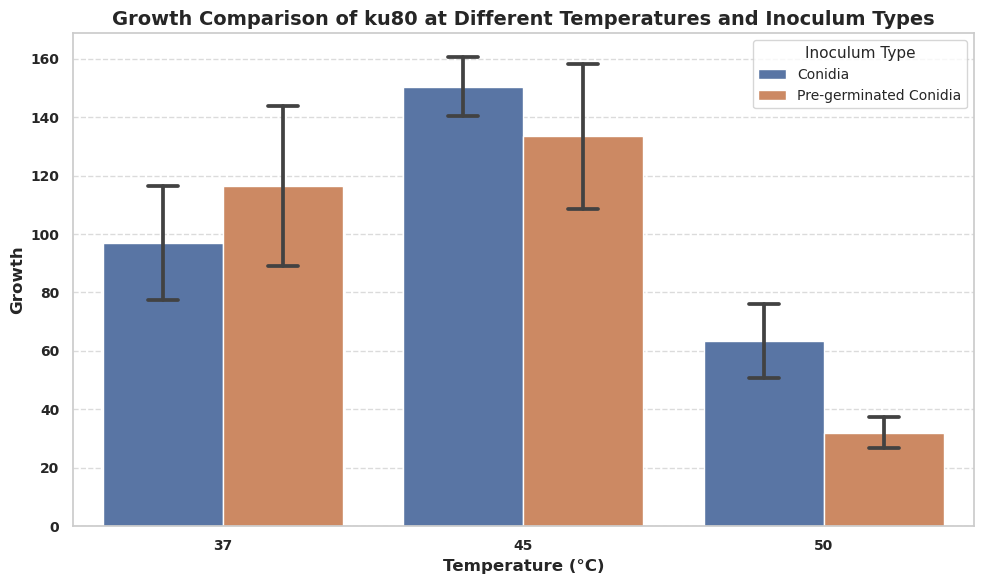

In [37]:
# === KU80 Growth Two-way ANOVA and Plotting ===

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_excel('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_growth_data_conidia_pregerminated.xlsx')

# Step 2: Drop missing values
df = df.dropna()

# Step 3: Perform Two-way ANOVA
model = ols('Growth ~ C(Temperature) + C(Inoculum_Type) + C(Temperature):C(Inoculum_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-way ANOVA Table ===")
print(anova_table)

# Save ANOVA results to CSV
anova_table.to_csv('ku80_conidia_vs_germinated_anova_results.csv')

# Step 4: Post-hoc Tukey Test
df['Group'] = df['Temperature'].astype(str) + "_" + df['Inoculum_Type']
tukey = pairwise_tukeyhsd(endog=df['Growth'], groups=df['Group'], alpha=0.05)
print("\n=== Post-hoc Tukey HSD Results ===")
print(tukey)

# Save Tukey results to CSV (fix: extract from summary table)
tukey_summary = tukey.summary()
tukey_df = pd.DataFrame(tukey_summary.data[1:], columns=tukey_summary.data[0])
tukey_df.to_csv('tukey_results.csv', index=False)

# Step 5: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Temperature', y='Growth', hue='Inoculum_Type', ci='sd', capsize=0.1)

plt.title('Growth Comparison of ku80 at Different Temperatures and Inoculum Types', fontsize=14, weight='bold')
plt.xlabel('Temperature (°C)', fontsize=12, weight='bold')
plt.ylabel('Growth', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.legend(title='Inoculum Type', title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save plot as high-resolution PNG and PDF
plt.savefig('ku80_growth_comparison.png', dpi=600)
plt.savefig('ku80_growth_comparison.pdf')

# Also show the plot
plt.show()



=== Two-way ANOVA Table ===
                                       sum_sq    df          F        PR(>F)
C(Temperature)                   52869.174032   2.0  65.801658  1.664679e-11
C(Inoculum_Type)                   762.875002   1.0   1.898968  1.787347e-01
C(Temperature):C(Inoculum_Type)   4135.201589   2.0   5.146725  1.222161e-02
Residual                         11650.208333  29.0        NaN           NaN

=== Post-hoc Tukey HSD Results ===
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------------------
               37_Conidia 37_Pre-germinated Conidia     19.65 0.5439  -15.6269  54.9269  False
               37_Conidia                45_Conidia     53.55 0.0009   18.2731  88.8269   True
               37_Conidia 45_Pre-germinated Conidia   36.4833  0.055   -0.5

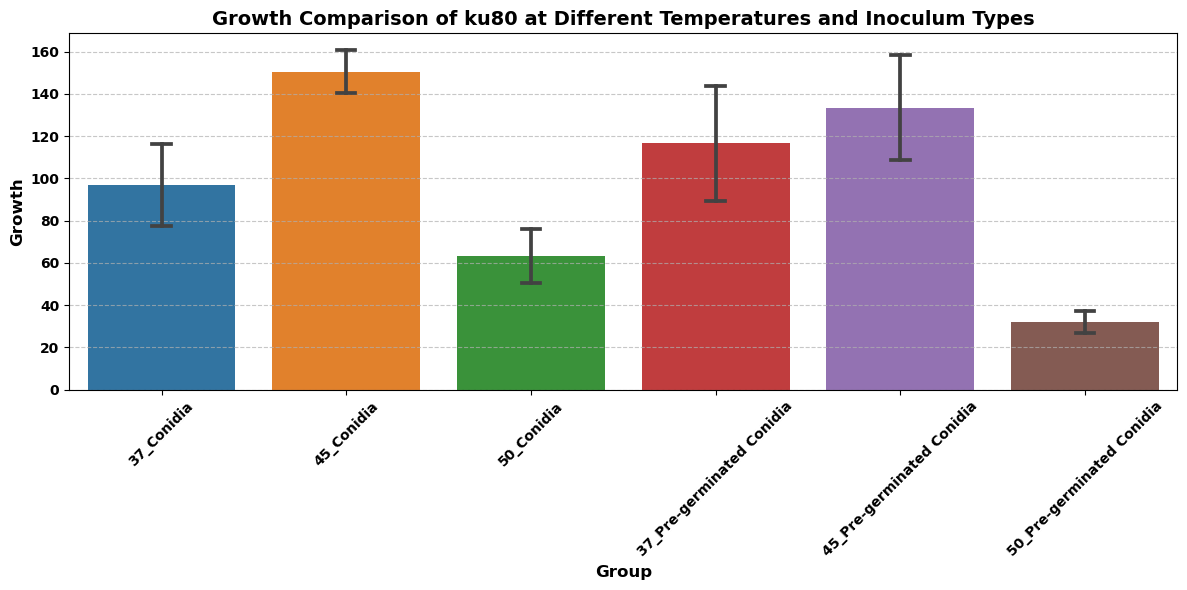

In [1]:
# === KU80 Growth Two-way ANOVA and Plotting with Inoculum Summary ===

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

# Step 1: Load and clean data
df = pd.read_excel('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_growth_data_conidia_pregerminated.xlsx')
df = df.dropna()
df['Group'] = df['Temperature'].astype(str) + "_" + df['Inoculum_Type']

# Step 2: Two-way ANOVA
model = ols('Growth ~ C(Temperature) + C(Inoculum_Type) + C(Temperature):C(Inoculum_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-way ANOVA Table ===")
print(anova_table)

# Save ANOVA results
anova_table.to_csv('ku80_conidia_vs_germinated_anova_results.csv')

# Step 3: Post-hoc Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['Growth'], groups=df['Group'], alpha=0.05)
tukey_summary = tukey.summary()
tukey_df = pd.DataFrame(tukey_summary.data[1:], columns=tukey_summary.data[0])
tukey_df.to_csv('tukey_results.csv', index=False)

print("\n=== Post-hoc Tukey HSD Results ===")
print(tukey)

# Step 4: Inoculum-focused summary
print("\n=== Inoculum Effect at Each Temperature ===")
for temp in sorted(df['Temperature'].unique()):
    group1 = f"{temp}_Conidia"
    group2 = f"{temp}_Pre-germinated Conidia"
    
    matches = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                       ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]
    
    if not matches.empty:
        pval = float(matches['p-adj'].values[0])
        if pval < 0.001:
            sig = '***'
        elif pval < 0.01:
            sig = '**'
        elif pval < 0.05:
            sig = '*'
        else:
            sig = 'NS'
        print(f"Temperature {temp}°C: p = {pval:.4f} → {sig}")
    else:
        print(f"Temperature {temp}°C: No comparison found.")

# Step 5: Plotting with precise significance annotations
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='Group', y='Growth', ci='sd', capsize=0.1)
plt.title('Growth Comparison of ku80 at Different Temperatures and Inoculum Types', fontsize=14, weight='bold')
plt.xlabel('Group', fontsize=12, weight='bold')
plt.ylabel('Growth', fontsize=12, weight='bold')
plt.xticks(rotation=45, fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add stars for significance between groups
group_positions = {group: idx for idx, group in enumerate(sorted(df['Group'].unique()))}
y_max = df['Growth'].max()
height_step = (df['Growth'].max() - df['Growth'].min()) * 0.05
used_heights = []

for i, row in tukey_df.iterrows():
    if row['reject'] == 'True':
        group1 = row['group1']
        group2 = row['group2']
        x1 = group_positions[group1]
        x2 = group_positions[group2]
        x_center = (x1 + x2) / 2
        y = y_max + height_step * (len(used_heights) + 1)
        used_heights.append(y)
        
        # Define significance level
        p_val = float(row['p-adj'])
        if p_val < 0.001:
            star = '***'
        elif p_val < 0.01:
            star = '**'
        else:
            star = '*'
        
        # Draw line and stars
        ax.plot([x1, x1, x2, x2], [y-0.5, y, y, y-0.5], lw=1.2, c='black')
        ax.text(x_center, y + 0.5, star, ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('ku80_growth_annotated_plot.pdf', dpi=600)
plt.savefig('ku80_growth_annotated_plot.png', dpi=600)
plt.show()



=== Two-way ANOVA Table ===
                                       sum_sq    df          F        PR(>F)
C(Temperature)                   52869.174032   2.0  65.801658  1.664679e-11
C(Inoculum_Type)                   762.875002   1.0   1.898968  1.787347e-01
C(Temperature):C(Inoculum_Type)   4135.201589   2.0   5.146725  1.222161e-02
Residual                         11650.208333  29.0        NaN           NaN

=== Post-hoc Tukey HSD Results ===
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------------------
               37_Conidia 37_Pre-germinated Conidia     19.65 0.5439  -15.6269  54.9269  False
               37_Conidia                45_Conidia     53.55 0.0009   18.2731  88.8269   True
               37_Conidia 45_Pre-germinated Conidia   36.4833  0.055   -0.5

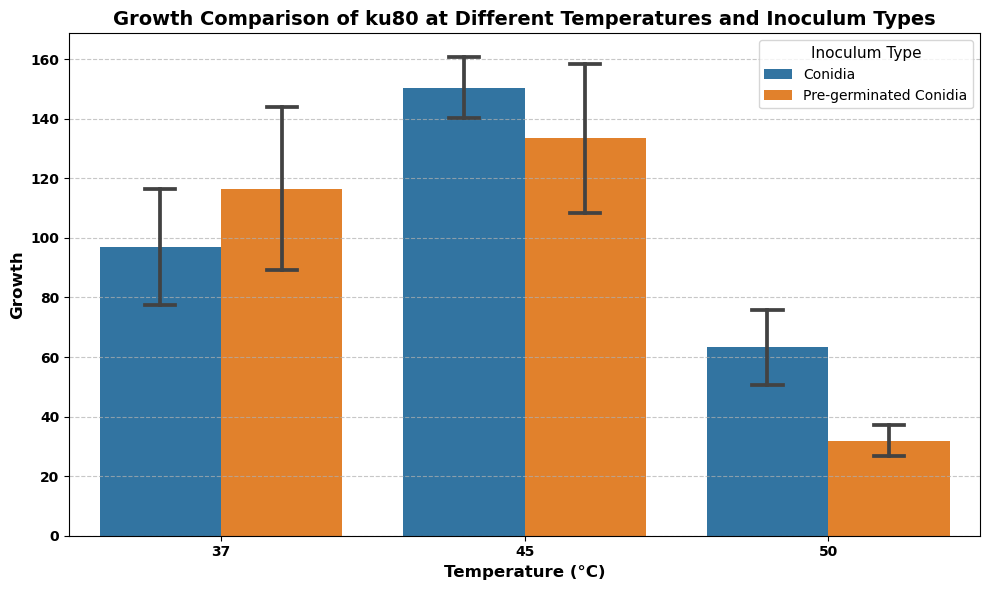

In [4]:
# === KU80 Growth Two-way ANOVA and Plotting with Grouped Layout and Annotations ===

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load and clean data
df = pd.read_excel('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_growth_data_conidia_pregerminated.xlsx')
df = df.dropna()
df['Group'] = df['Temperature'].astype(str) + '_' + df['Inoculum_Type']

# Step 2: Two-way ANOVA
model = ols('Growth ~ C(Temperature) + C(Inoculum_Type) + C(Temperature):C(Inoculum_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-way ANOVA Table ===")
print(anova_table)
anova_table.to_csv('ku80_conidia_vs_germinated_anova_results.csv')

# Step 3: Post-hoc Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['Growth'], groups=df['Group'], alpha=0.05)
tukey_summary = tukey.summary()
tukey_df = pd.DataFrame(tukey_summary.data[1:], columns=tukey_summary.data[0])
tukey_df.to_csv('tukey_results.csv', index=False)

print("\n=== Post-hoc Tukey HSD Results ===")
print(tukey)

# Step 4: Inoculum-focused summary
print("\n=== Inoculum Effect at Each Temperature ===")
for temp in sorted(df['Temperature'].unique()):
    group1 = f"{temp}_Conidia"
    group2 = f"{temp}_Pre-germinated Conidia"
    match = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                     ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]
    if not match.empty:
        pval = float(match['p-adj'].values[0])
        if pval < 0.001:
            sig = '***'
        elif pval < 0.01:
            sig = '**'
        elif pval < 0.05:
            sig = '*'
        else:
            sig = 'NS'
        print(f"Temperature {temp}°C: p = {pval:.4f} → {sig}")
    else:
        print(f"Temperature {temp}°C: No comparison found.")

# Step 5: Plotting with grouped bar layout
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Temperature', y='Growth', hue='Inoculum_Type', ci='sd', capsize=0.1)

plt.title('Growth Comparison of ku80 at Different Temperatures and Inoculum Types', fontsize=14, weight='bold')
plt.xlabel('Temperature (°C)', fontsize=12, weight='bold')
plt.ylabel('Growth', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.legend(title='Inoculum Type', title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# === Add significance stars between inoculum types at each temperature ===
# Dynamically detect positions and annotate significance

# Build x-axis and hue positions
hue_order = df['Inoculum_Type'].unique().tolist()
x_order = sorted(df['Temperature'].unique())
group_centers = {t: i for i, t in enumerate(x_order)}
hue_offsets = {
    hue: offset for hue, offset in zip(hue_order, np.linspace(-0.2, 0.2, len(hue_order)))
}

y_max = df['Growth'].max()
height_step = (df['Growth'].max() - df['Growth'].min()) * 0.07
annot_count = 1

for temp in x_order:
    group1 = f"{temp}_Conidia"
    group2 = f"{temp}_Pre-germinated Conidia"

    match = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                     ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]

    if not match.empty:
        pval = float(match['p-adj'].values[0])
        if pval < 0.001:
            star = '***'
        elif pval < 0.01:
            star = '**'
        elif pval < 0.05:
            star = '*'
        else:
            continue  # Not significant

        x_base = group_centers[temp]
        x1 = x_base + hue_offsets.get('Conidia', -0.2)
        x2 = x_base + hue_offsets.get('Pre-germinated Conidia', 0.2)
        y = y_max + height_step * annot_count

        ax.plot([x1, x1, x2, x2], [y-1, y, y, y-1], c='black', lw=1.2)
        ax.text((x1 + x2)/2, y + 1.5, star, ha='center', va='bottom', fontsize=14, fontweight='bold')
        annot_count += 1

plt.tight_layout()
plt.savefig('ku80_growth_grouped_layout_annotated.pdf', dpi=600)
plt.savefig('ku80_growth_grouped_layout_annotated.png', dpi=600)
plt.show()



=== Two-way ANOVA Table ===
                                       sum_sq    df          F        PR(>F)
C(Temperature)                   52869.174032   2.0  65.801658  1.664679e-11
C(Inoculum_Type)                   762.875002   1.0   1.898968  1.787347e-01
C(Temperature):C(Inoculum_Type)   4135.201589   2.0   5.146725  1.222161e-02
Residual                         11650.208333  29.0        NaN           NaN

=== Post-hoc Tukey HSD Results ===
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------------------
               37_Conidia 37_Pre-germinated Conidia     19.65 0.5439  -15.6269  54.9269  False
               37_Conidia                45_Conidia     53.55 0.0009   18.2731  88.8269   True
               37_Conidia 45_Pre-germinated Conidia   36.4833  0.055   -0.5

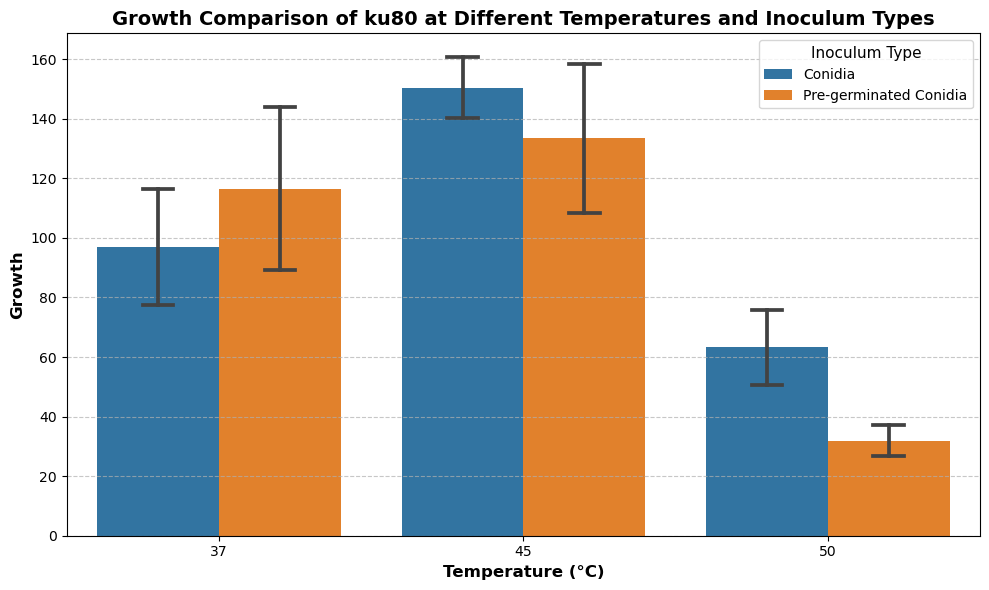

In [1]:
# === KU80 Growth Two-way ANOVA and Plotting with Grouped Layout and Annotations ===

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load and clean data
df = pd.read_excel('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_growth_data_conidia_pregerminated.xlsx')
df = df.dropna()
df['Group'] = df['Temperature'].astype(str) + '_' + df['Inoculum_Type']

# Step 2: Two-way ANOVA
model = ols('Growth ~ C(Temperature) + C(Inoculum_Type) + C(Temperature):C(Inoculum_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-way ANOVA Table ===")
print(anova_table)
anova_table.to_csv('ku80_conidia_vs_germinated_anova_results.csv')

# Step 3: Post-hoc Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['Growth'], groups=df['Group'], alpha=0.05)
tukey_summary = tukey.summary()
tukey_df = pd.DataFrame(tukey_summary.data[1:], columns=tukey_summary.data[0])
tukey_df.to_csv('tukey_results.csv', index=False)

print("\n=== Post-hoc Tukey HSD Results ===")
print(tukey)

# Step 4: Inoculum-focused summary
print("\n=== Inoculum Effect at Each Temperature ===")
for temp in sorted(df['Temperature'].unique()):
    group1 = f"{temp}_Conidia"
    group2 = f"{temp}_Pre-germinated Conidia"
    match = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                     ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]
    if not match.empty:
        pval = float(match['p-adj'].values[0])
        if pval < 0.001:
            sig = '***'
        elif pval < 0.01:
            sig = '**'
        elif pval < 0.05:
            sig = '*'
        else:
            sig = 'NS'
        print(f"Temperature {temp}°C: p = {pval:.4f} → {sig}")
    else:
        print(f"Temperature {temp}°C: No comparison found.")

# Step 5: Plotting with grouped bar layout
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Temperature', y='Growth', hue='Inoculum_Type', ci='sd', capsize=0.1)

plt.title('Growth Comparison of ku80 at Different Temperatures and Inoculum Types', fontsize=14, weight='bold')
plt.xlabel('Temperature (°C)', fontsize=12, weight='bold')
plt.ylabel('Growth', fontsize=12, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Inoculum Type', title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# === Add significance stars between inoculum types at each temperature ===
# Dynamically detect positions and annotate significance

# Build x-axis and hue positions
hue_order = df['Inoculum_Type'].unique().tolist()
x_order = sorted(df['Temperature'].unique())
group_centers = {t: i for i, t in enumerate(x_order)}
hue_offsets = {
    hue: offset for hue, offset in zip(hue_order, np.linspace(-0.2, 0.2, len(hue_order)))
}

y_max = df['Growth'].max()
height_step = (df['Growth'].max() - df['Growth'].min()) * 0.07
annot_count = 1

for temp in x_order:
    group1 = f"{temp}_Conidia"
    group2 = f"{temp}_Pre-germinated Conidia"

    match = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                     ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]

    if not match.empty:
        pval = float(match['p-adj'].values[0])
        if pval < 0.001:
            star = '***'
        elif pval < 0.01:
            star = '**'
        elif pval < 0.05:
            star = '*'
        else:
            continue  # Not significant

        x_base = group_centers[temp]
        x1 = x_base + hue_offsets.get('Conidia', -0.2)
        x2 = x_base + hue_offsets.get('Pre-germinated Conidia', 0.2)
        y = y_max + height_step * annot_count

        ax.plot([x1, x1, x2, x2], [y-1, y, y, y-1], c='black', lw=1.2)
        ax.text((x1 + x2)/2, y + 1.5, star, ha='center', va='bottom', fontsize=14, fontweight='bold')
        annot_count += 1

plt.tight_layout()
plt.savefig('ku80_growth_grouped_layout_annotated.pdf', dpi=600)
plt.savefig('ku80_growth_grouped_layout_annotated.png', dpi=600)
plt.show()
